Vertices-base/raiz: []
Vertices-folha: []
Ramificação de Saída: {'a': 3, 'b': 2, 'c': 2, 'd': 1}
Ramificação de Entrada: {'a': 1, 'b': 2, 'c': 3, 'd': 2}


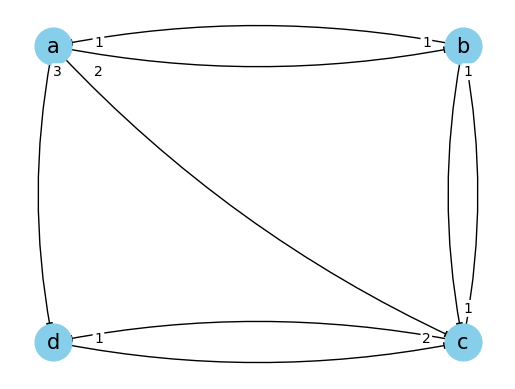

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo direcionado
grafo = nx.MultiDiGraph()

# Adicionando vértices e arestas com pesos
grafo.add_edge('a', 'b', weight=1)
grafo.add_edge('b', 'a', weight=1)
grafo.add_edge('a', 'c', weight=2)
grafo.add_edge('a', 'd', weight=3)
grafo.add_edge('c', 'b', weight=1)
grafo.add_edge('d', 'c', weight=1)
grafo.add_edge('c', 'd', weight=2)
grafo.add_edge('b', 'c', weight=1)

# Definindo a posição dos vértices
posicoes = {'a': (0, 1), 'b': (1, 1), 'c': (1, 0), 'd': (0, 0)}

# Desenhando o grafo
nx.draw_networkx_nodes(grafo, posicoes, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(grafo, posicoes, font_size=15)

# Desenhar arestas com curvas suaves
for (origem, destino, chave) in grafo.edges(keys=True):
    estilo = 'arc3, rad=0.1' if chave == 0 else 'arc3, rad=-0.1'
    nx.draw_networkx_edges(grafo, posicoes, edgelist=[(origem, destino)], connectionstyle=estilo)

# Rótulos de arestas
rotulos_arestas = {(origem, destino): dados['weight'] for origem, destino, dados in grafo.edges(data=True)}
for (origem, destino), peso in rotulos_arestas.items():
    pos_origem = posicoes[origem]
    pos_texto = (pos_origem[0] * 0.9 + posicoes[destino][0] * 0.1, pos_origem[1] * 0.9 + posicoes[destino][1] * 0.1)
    plt.text(pos_texto[0], pos_texto[1], s=peso, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# Função para identificar raízes e folhas
def find_root_and_leaf_nodes(G):
    root_nodes = [node for node, deg in G.in_degree() if deg == 0]
    leaf_nodes = [node for node, deg in G.out_degree() if deg == 0]
    return root_nodes, leaf_nodes

# Usar a função no grafo atual
root_nodes, leaf_nodes = find_root_and_leaf_nodes(grafo)
print(f'Vertices-base/raiz: {root_nodes}')
print(f'Vertices-folha: {leaf_nodes}')

# Ramificações de saída e entrada
ramificacao_saida = {node: grafo.out_degree(node) for node in grafo.nodes()}
ramificacao_entrada = {node: grafo.in_degree(node) for node in grafo.nodes()}

print("Ramificação de Saída:", ramificacao_saida)
print("Ramificação de Entrada:", ramificacao_entrada)

# Mostrar o grafo
plt.axis('off')
plt.show()
